## Question 2: 

In [ ]:
import numpy as np

def lagrange_interp(x, x_nodes, f_nodes):
    n = len(x_nodes)
    L = 0.0
    for i in range(n):
        l_i = 1.0
        for j in range(n):
            if i != j:
                l_i *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        L += f_nodes[i] * l_i
    return L

# Part (a) data
x_nodes_a = np.array([0.0, 0.25, 0.5, 0.75])
f_nodes_a = np.array([1.0, 1.64872, 2.71828, 4.48169])
x_eval_a = 0.43

print('Part (a):')
for deg in [1,2,3]:
    x_sub = x_nodes_a[:deg+1]
    f_sub = f_nodes_a[:deg+1]
    approx = lagrange_interp(x_eval_a, x_sub, f_sub)
    print(f'Degree {deg}: f({x_eval_a}) ≈ {approx:.6f}')

# Part (b) data
x_nodes_b = np.array([-0.5, -0.25, 0.25, 0.5])
f_nodes_b = np.array([1.93750, 1.33203, 0.800781, 0.687500])
x_eval_b = 0.0

print('\nPart (b):')
for deg in [1,2,3]:
    x_sub = x_nodes_b[:deg+1]
    f_sub = f_nodes_b[:deg+1]
    approx = lagrange_interp(x_eval_b, x_sub, f_sub)
    print(f'Degree {deg}: f({x_eval_b}) ≈ {approx:.6f}')

Part (a):
Degree 1: f(0.43) ≈ 2.115798
Degree 2: f(0.43) ≈ 2.376383
Degree 3: f(0.43) ≈ 2.360605

Part (b):
Degree 1: f(0.0) ≈ 0.726560
Degree 2: f(0.0) ≈ 0.953124
Degree 3: f(0.0) ≈ 0.984374


## Question 5: 

In [21]:
import numpy as np
def divided_differences(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            table[i,j] = (table[i+1,j-1] - table[i,j-1]) / (x[i+j] - x[i])
    return table[0]
x = np.array([-2, -1, 0, 1, 2, 3])
y = np.array([1, 4, 11, 16, 13, -4])
coeffs = divided_differences(x, y)
print("Divided differences:", coeffs)
print("Highest nonzero order:", np.max(np.nonzero(np.abs(coeffs) > 1e-12)))

# Only up to degree 3 is nonzero, so the polynomial is cubic.

Divided differences: [ 1.  3.  2. -1.  0.  0.]
Highest nonzero order: 3


## Question 6:

In [ ]:
from scipy.interpolate import interp1d

def f(x):
    return 2 - x**2 * np.sin(x)

x_nodes = np.linspace(0.5, 2, 5)
f_nodes = f(x_nodes)

# interpolate inverse as a function of f
inv_interp = interp1d(f_nodes, x_nodes, kind='cubic')
p1 = float(inv_interp(0))
print(f"First root estimate p1: {p1:.6f}, f(p1) = {f(p1):.2e}")

# refine with interval 0.1 around p1
x_nodes2 = np.linspace(p1-0.05, p1+0.05, 5)
f_nodes2 = f(x_nodes2)
inv_interp2 = interp1d(f_nodes2, x_nodes2, kind='cubic')
p2 = float(inv_interp2(0))
print(f"Refined root estimate p2: {p2:.6f}, f(p2) = {f(p2):.2e}")

First root estimate p1: 1.414686, f(p1) = 2.30e-02
Refined root estimate p2: 1.422083, f(p2) = -2.88e-09


#### We don't use [-1,2] Because f(x) may not be monotonic or invertible on the larger interval, and interpolation may give us larger errors or roots outside the region of interest.

## Question 7: 

N=4: max error = 9.76e-02


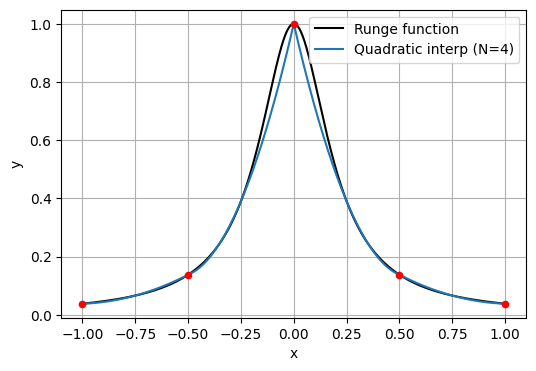

N=10: max error = 2.96e-02


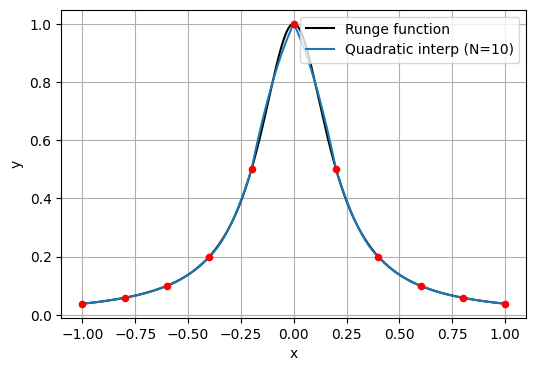

N=20: max error = 4.29e-03


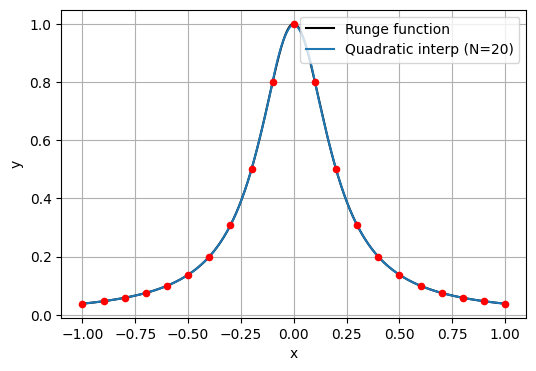

N=50: max error = 2.95e-04


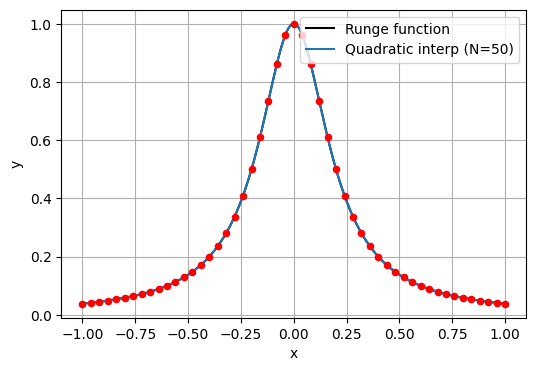

N=100: max error = 3.63e-05


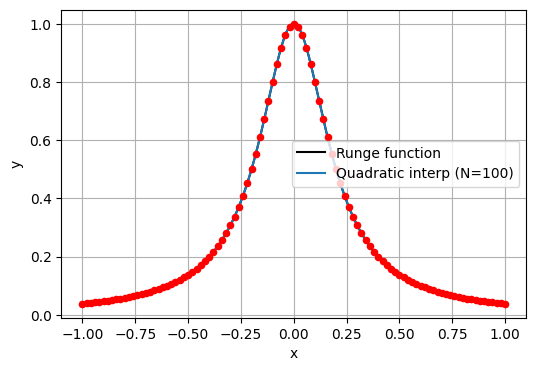

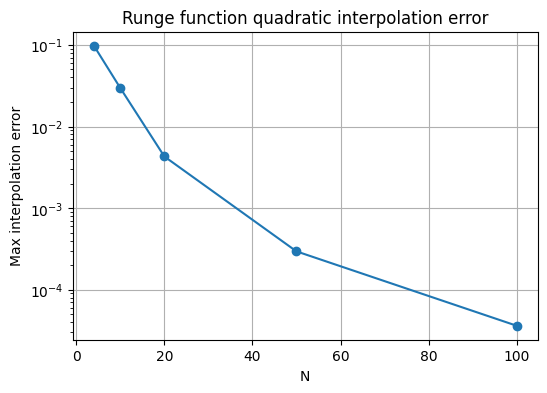

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def runge(x):
    return 1 / (1 + 25 * x**2)

def quad_interp(x, x0, x1, x2, y0, y1, y2):
    L0 = ((x - x1)*(x - x2))/((x0 - x1)*(x0 - x2))
    L1 = ((x - x0)*(x - x2))/((x1 - x0)*(x1 - x2))
    L2 = ((x - x0)*(x - x1))/((x2 - x0)*(x2 - x1))
    return y0*L0 + y1*L1 + y2*L2

Ns = [4, 10, 20, 50, 100]
errors = []
x_test = np.linspace(-1, 1, 1000)
y_true = runge(x_test)

for N in Ns:
    x_edges = np.linspace(-1, 1, N+1)
    y_interp = np.zeros_like(x_test)
    for i in range(N):
        x0 = x_edges[i]
        x2 = x_edges[i+1]
        x1 = 0.5*(x0 + x2)
        y0, y1, y2 = runge(x0), runge(x1), runge(x2)
        mask = (x_test >= x0) & (x_test <= x2)
        y_interp[mask] = quad_interp(x_test[mask], x0, x1, x2, y0, y1, y2)
    error = np.max(np.abs(y_true - y_interp))
    errors.append(error)
    print(f"N={N}: max error = {error:.2e}")
    plt.figure(figsize=(6,4))
    plt.plot(x_test, y_true, 'k-', label='Runge function')
    plt.plot(x_test, y_interp, label=f'Quadratic interp (N={N})')
    plt.scatter(x_edges, runge(x_edges), color='red', s=20, zorder=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=(6,4))
plt.semilogy(Ns, errors, 'o-')
plt.xlabel('N')
plt.ylabel('Max interpolation error')
plt.title('Runge function quadratic interpolation error')
plt.grid(True)
plt.show()